<a href="https://colab.research.google.com/github/SLy-Precision/Using-Data-to-Find-Optimal-Path-to-Data-Science-High-Salary/blob/main/Using_Data_to_Find_Optimal_Path_in_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Lineales: Proyecto

### Jesus Antonio Guerrero López

### Sebastian Garcia Rodriguez

### 🔮 Today, Data Science stands out as a highly appealing employment field for scientists, engineers, and many other technical or analytical professionals. Its rapid growth and the variety of roles it includes have made it one of the most competitive and well-paid areas in the current job market. Using the concepts studied in the Linear Models course, we can try to go beyond general claims and perform a structured analysis:

* Can we carry out an analysis to determine which specific areas of data science offer the best salary rewards?

* Can we identify the one that provides the best compensation for the effort represented by experience?

* Or the specific professional profile required to earn more than 80 percent of the people who work in this field?

### To explore these questions, we will rely on quantitative tools and methods. We will use linear and nonlinear regressions to examine how salaries vary with experience and job characteristics, decision trees to identify patterns and interactions between variables, and statistical tests to evaluate the significance of these relationships. With this combination of techniques, we aim to obtain a clearer understanding of which specializations, skills, and experience levels provide the greatest financial return within the data science landscape. 👨🏻‍💻




In [312]:
# Libraries we are gonna use

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc, mean_absolute_error, r2_score)

# Get the data from my unit

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Proyecto Modelos Lineales/'


df = pd.read_csv(path + 'data_science_salaries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
# Check da df in general

print(df.info())

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


In [314]:
# Lets explore all the posible entries in every column

print("Elements in column 'job_title': \n")
print(df['job_title'].unique())
print("\n")

print("Elements in column  'experience_level': \n")
print(df['experience_level'].unique())
print("\n")

print("Elements in column  'employment_type': \n")
print(df['employment_type'].unique())
print("\n")

print("Elements in column 'work_models': \n")
print(df['work_models'].unique())
print("\n")

print("Elements in column 'company_location': \n")
print(df['company_location'].unique())
print("\n")

print("Elements in column 'company_size': \n")
print(df['company_size'].unique())
print("\n")


Elements in column 'job_title': 

['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastructure Engineer' 'D

## Preprocesing Data

Numbre of data per job
job_title
Data Engineer                               1307
Data Scientist                              1243
Data Analyst                                 910
Machine Learning Engineer                    629
Analytics Engineer                           246
Research Scientist                           206
Data Architect                               176
Research Engineer                            136
ML Engineer                                  113
Applied Scientist                             97
Data Science Manager                          86
Business Intelligence Analyst                 82
Machine Learning Scientist                    73
Business Intelligence Engineer                69
Data Manager                                  63
Research Analyst                              60
Data Science                                  56
AI Engineer                                   48
Data Specialist                               47
Data Science Consultant             

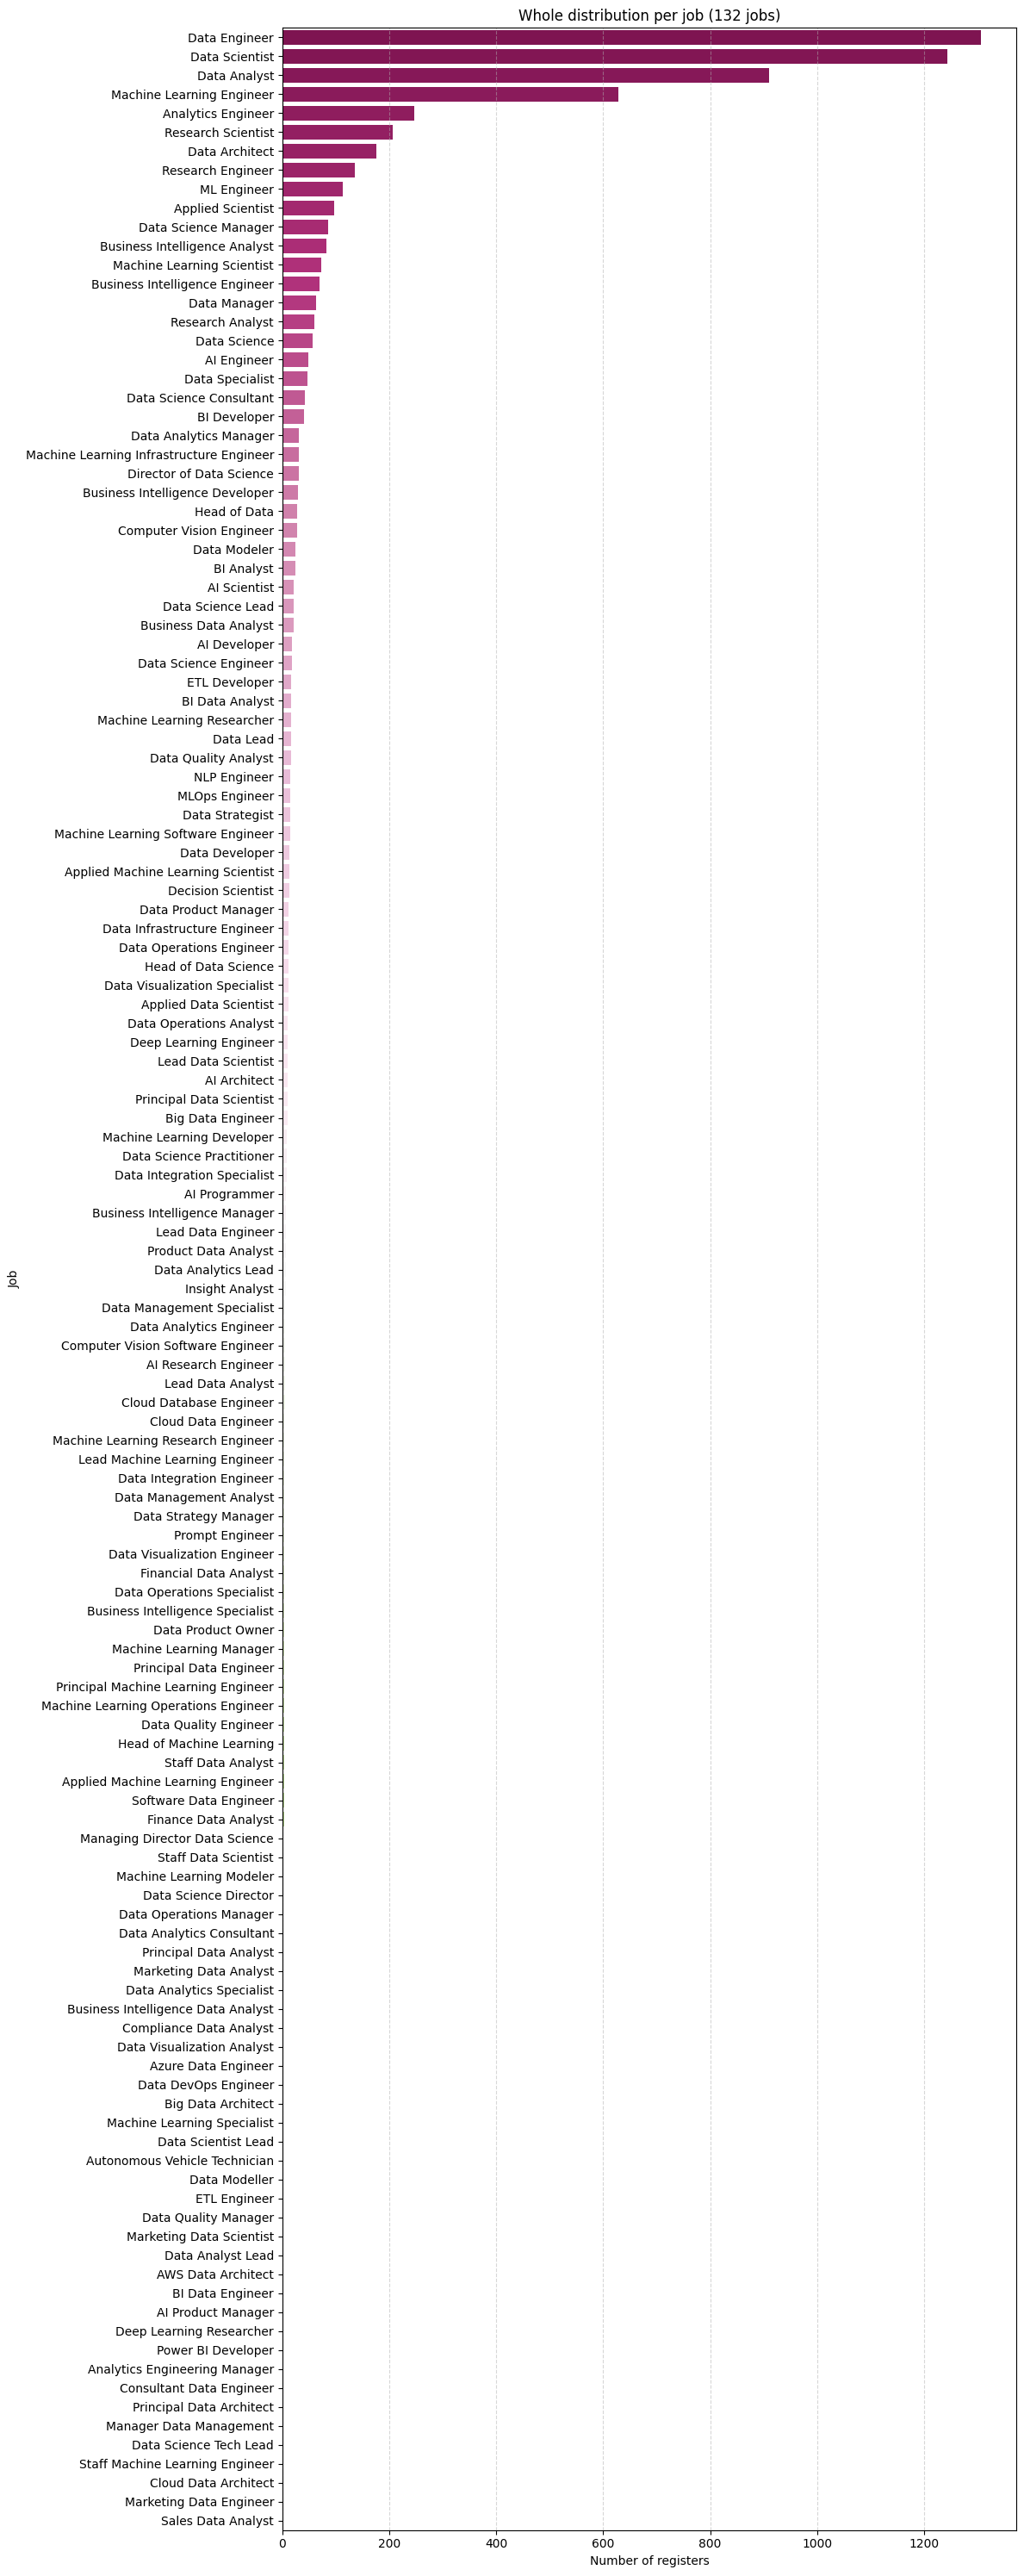

In [315]:
# We could have unbalnced data
# Lets explore per job and country

# All jobs
conteo_total = df['job_title'].value_counts()

# plot data
print("Numbre of data per job")
pd.set_option('display.max_rows', None)
print(conteo_total)
pd.reset_option('display.max_rows')


# Large Graph
plt.figure(figsize=(12, 30))

sns.barplot(
    y=conteo_total.index,
    x=conteo_total.values,
    hue=conteo_total.index,
    palette="PiYG",
    legend=False
)

plt.title(f'Whole distribution per job ({len(conteo_total)} jobs)')
plt.xlabel('Number of registers')
plt.ylabel('Job')
plt.grid(axis='x', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

Total of final categories: 21
job_title
Data Engineer                      1307
Data Scientist                     1299
Data Analyst                        910
Machine Learning Engineer           742
Data Science Manager                261
Analytics Engineer                  246
Research Scientist                  206
Data Architect                      200
Business Intelligence Analyst       144
Research Engineer                   136
Applied Scientist                    97
Machine Learning Scientist           73
Business Intelligence Developer      70
Business Intelligence Engineer       69
Research Analyst                     60
MLOps Engineer                       51
AI Engineer                          48
Data Specialist                      47
Data Science Consultant              42
Computer Vision Engineer             28
AI Scientist                         22
Name: count, dtype: int64


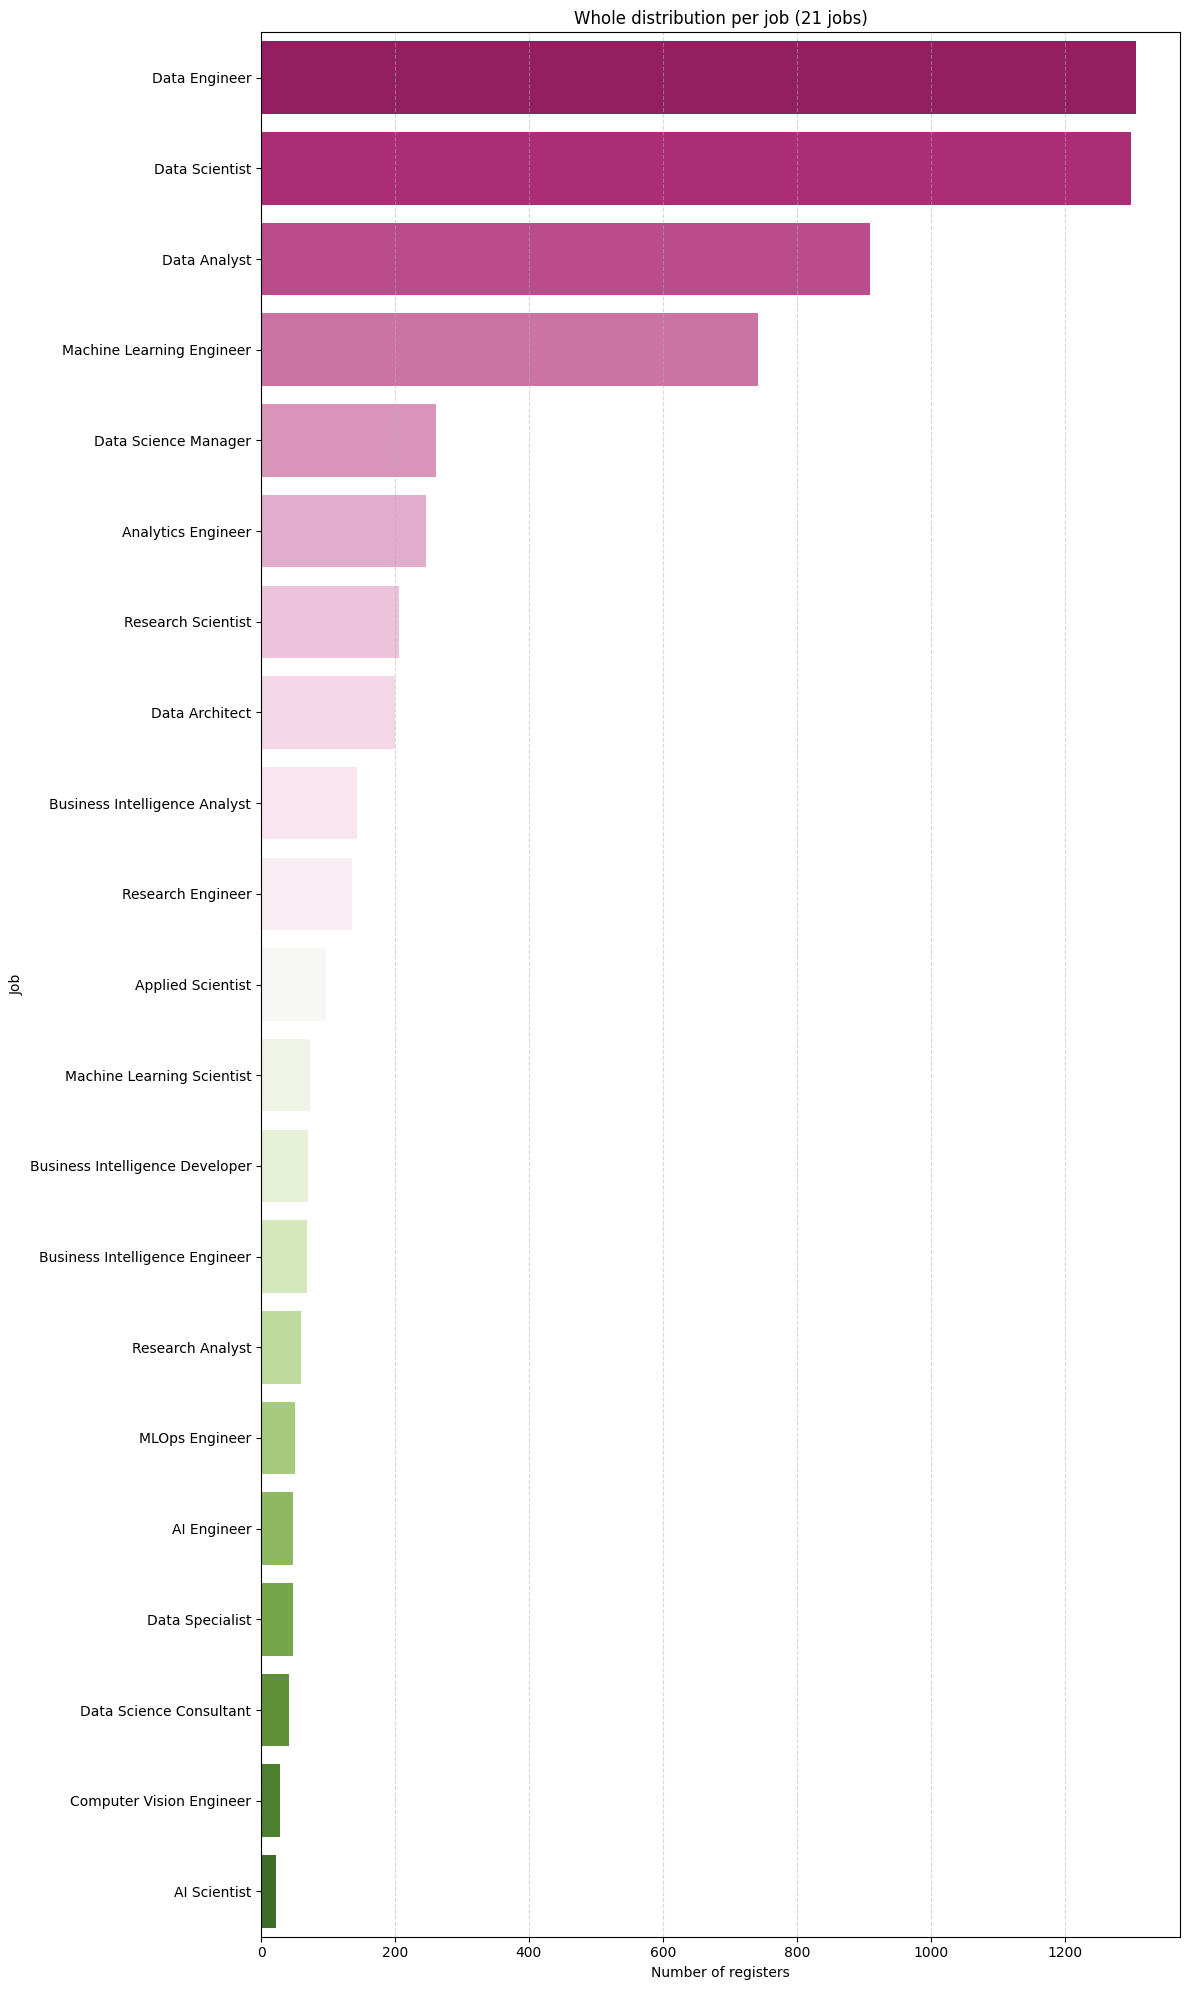

In [316]:
# Here we are gonna adjust data, because is highly unbalanced as we saw in the plot befpre

# Here we make a new mapping in jobs with different names buy they are probably the same
df['job_title'] = df['job_title'].replace({
    'ML Engineer': 'Machine Learning Engineer',
    'BI Data Analyst': 'Business Intelligence Analyst',
    'BI Analyst': 'Business Intelligence Analyst',
    'BI Developer': 'Business Intelligence Developer',
    'Data Science': 'Data Scientist',
    'Business Data Analyst': 'Business Intelligence Analyst',
    'BI Data Analyst': 'Business Intelligence Analyst',

    'Director of Data Science': 'Data Science Manager',
    'Head of Data': 'Data Science Manager',
    'Data Analytics Manager': 'Data Science Manager',
    'Data Science Lead': 'Data Science Manager',
    'Data Manager': 'Data Science Manager',

    'Data Modeler': 'Data Architect',

    'Machine Learning Infrastructure Engineer': 'MLOps Engineer',
    'Machine Learning Operations Engineer': 'MLOps Engineer',
    'Data DevOps Engineer': 'MLOps Engineer',
})

# We ask for more jobs with more than 20 entries, because we need good quantities of data for the models
conteo_puestos = df['job_title'].value_counts()
puestos_validos = conteo_puestos[conteo_puestos >= 20].index.tolist()

df['job_title'] = df['job_title'].apply(lambda x: x if x in puestos_validos else 'Other')

# Eliminate "Other" of the df
df = df.drop(df[df['job_title'] == 'Other'].index)

# Check how it looks
print(f"Total of final categories: {df['job_title'].nunique()}")
print(df['job_title'].value_counts())

# Plot the new graph
conteo_total = df['job_title'].value_counts()

plt.figure(figsize=(12, 20))

sns.barplot(
    y=conteo_total.index,
    x=conteo_total.values,
    hue=conteo_total.index,
    palette='PiYG',
    legend=False
)

plt.title(f'Whole distribution per job ({len(conteo_total)} jobs)')
plt.xlabel('Number of registers')
plt.ylabel('Job')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [317]:
# We are gonna delete some columns

cols_a_borrar = ['salary', 'salary_currency', 'employee_residence']
df = df.drop(columns=[c for c in cols_a_borrar if c in df.columns])


# Now we move to categorical data

# First with ordinal data, those with magnitude value inside

# These are 'experience_level' and 'company_size'

mapa_experiencia = {
    'Entry-level': 0,
    'Mid-level': 1,
    'Senior-level': 2,
    'Executive-level': 3
}

mapa_tamano = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

# Aplying maping
df['experience_level'] = df['experience_level'].map(mapa_experiencia)
df['company_size'] = df['company_size'].map(mapa_tamano)


In [318]:
# Lets check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6058 entries, 0 to 6598
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_title         6058 non-null   object
 1   experience_level  6058 non-null   int64 
 2   employment_type   6058 non-null   object
 3   work_models       6058 non-null   object
 4   work_year         6058 non-null   int64 
 5   salary_in_usd     6058 non-null   int64 
 6   company_location  6058 non-null   object
 7   company_size      6058 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 426.0+ KB


In [319]:
# Lets see the final result

df.head(10)

,job_title,experience_level,employment_type,work_models,work_year,salary_in_usd,company_location,company_size
0,Data Engineer,1,Full-time,Remote,2024,148100,United States,1
1,Data Engineer,1,Full-time,Remote,2024,98700,United States,1
2,Data Scientist,2,Full-time,Remote,2024,140032,United States,1
3,Data Scientist,2,Full-time,Remote,2024,100022,United States,1
4,Business Intelligence Developer,1,Full-time,On-site,2024,120000,United States,1
5,Business Intelligence Developer,1,Full-time,On-site,2024,62100,United States,1
6,Research Analyst,0,Full-time,On-site,2024,250000,United States,1
7,Research Analyst,0,Full-time,On-site,2024,150000,United States,1
8,Data Engineer,3,Full-time,Remote,2024,219650,United States,1
9,Data Engineer,3,Full-time,Remote,2024,136000,United States,1


In [320]:
# See what are profile of extreamly high salaries

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# more than 600,000
rich_kids = df[df['salary_in_usd'] > 600000]

print(f"These are the more rich {len(rich_kids)} with more than > $600,000:")
print("-" * 50)
print(rich_kids)

# Plot
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

These are the more rich 9 with more than > $600,000:
--------------------------------------------------
                       job_title  experience_level employment_type work_models  work_year  salary_in_usd company_location  company_size
296   Machine Learning Scientist                 1       Full-time     On-site       2024         750000    United States             1
321            Research Engineer                 1       Full-time     On-site       2024         720000    United States             1
329           Research Scientist                 1       Full-time     On-site       2024         720000    United States             1
848   Machine Learning Scientist                 1       Full-time     On-site       2023         750000    United States             1
852    Machine Learning Engineer                 1       Full-time     On-site       2023         750000    United States             1
1095          Analytics Engineer                 2       Full-time      Remote  

In [321]:
# They look really strange dta, maybe social advantage we cant measure with df, lets elimiate for estimations

filas_antes = len(df)

df = df[df['salary_in_usd'] <= 600000].copy()

df.reset_index(drop=True, inplace=True)

filas_despues = len(df)
print(f"Deleted rows: {filas_antes - filas_despues}")
print(f"New highst salary in dataset: ${df['salary_in_usd'].max():,.0f}")

Deleted rows: 9
New highst salary in dataset: $465,000


## General Stadistical Analysis

Percentil value 80 es: $200,000.00
It means Top 20% earn more than $200,000


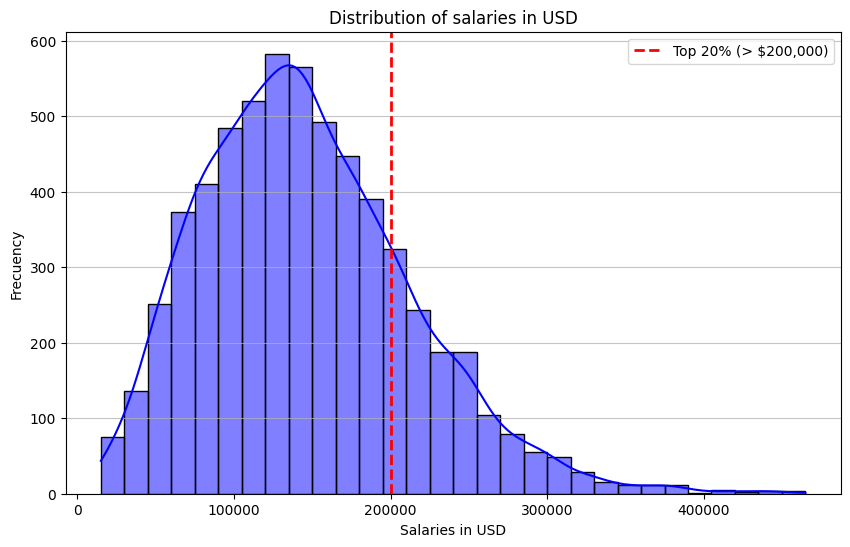

In [322]:
# Lets see the distribution of the salaries and the percenntile for 80%

# 1. Calculate the 90th percentile
# This value represents the salary that is higher than 80% of the population
umbral = df['salary_in_usd'].quantile(0.80)

# Print the specific value to console
print(f"Percentil value 80 es: ${umbral:,.2f}")
print(f"It means Top 20% earn more than ${umbral:,.0f}")

# Plot the distribution
plt.figure(figsize=(10, 6))

# Main histogram plot
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='blue')

# Vertical red dashed line at the 80th percentile
plt.axvline(x=umbral, color='red', linestyle='--', linewidth=2, label=f'Top 20% (> ${umbral:,.0f})')

plt.title('Distribution of salaries in USD')
plt.xlabel('Salaries in USD')
plt.ylabel('Frecuency')

plt.legend()
plt.grid(axis='y', alpha=0.75)

plt.show()

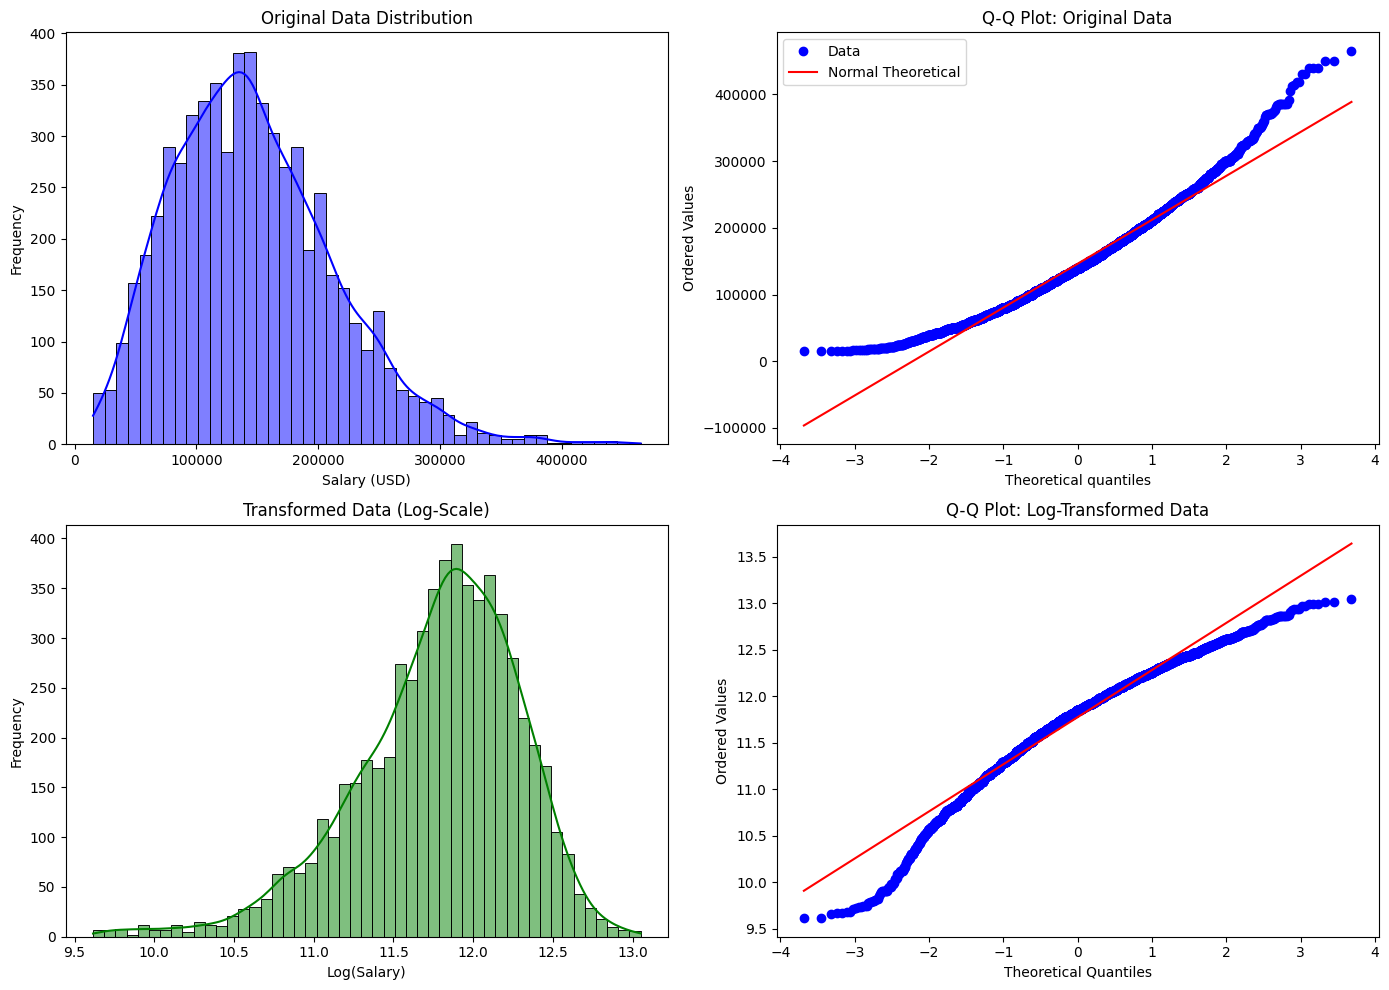

NORMALITY TEST RESULTS (ON LOG DATA)
KS Statistic: 0.0665
P-Value: 1.1031e-23


Data is NOT perfectly Normal (p < 0.05).


In [323]:
# Lets see if we can use ANOVA, checkin the residuals

# We dont have aparnetly normal data distribution, log-normal maybe, so we use log
# We use log1p (log(x+1)) to ensure stability, although salaries are usually > 0
salario_original = df['salary_in_usd']
salario_log = np.log1p(df['salary_in_usd'])

# Visualization
fig, ejes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
sns.histplot(salario_original, kde=True, ax=ejes[0, 0], color='blue')
ejes[0, 0].set_title('Original Data Distribution')
ejes[0, 0].set_xlabel('Salary (USD)')
ejes[0, 0].set_ylabel('Frequency')

# Q-Q Plot Original (If Log-Normal, this could curved like a banana)
stats.probplot(salario_original, dist="norm", plot=ejes[0, 1])
ejes[0, 1].set_title('Q-Q Plot: Original Data')
ejes[0, 1].get_lines()[0].set_label('Data')
ejes[0, 1].get_lines()[1].set_label('Normal Theoretical')
ejes[0, 1].legend()


# Histogram Log
sns.histplot(salario_log, kde=True, ax=ejes[1, 0], color='green')
ejes[1, 0].set_title('Transformed Data (Log-Scale)')
ejes[1, 0].set_xlabel('Log(Salary)')
ejes[1, 0].set_ylabel('Frequency')

# Q-Q Plot Log
stats.probplot(salario_log, dist="norm", plot=ejes[1, 1])
ejes[1, 1].set_title('Q-Q Plot: Log-Transformed Data')
ejes[1, 1].set_xlabel('Theoretical Quantiles')
ejes[1, 1].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

# Kolmogorov-Smirnov
# Comparing our log-data against a theoretical normal distribution

print("NORMALITY TEST RESULTS (ON LOG DATA)")

# Standardize data for the test (Mean 0, Std 1)
salario_log_std = (salario_log - salario_log.mean()) / salario_log.std()

estadistico_ks, p_valor = stats.kstest(salario_log_std, 'norm')

print(f"KS Statistic: {estadistico_ks:.4f}")
print(f"P-Value: {p_valor:.4e}")

print("\n")

# ANOVA
if p_valor > 0.05:
    print("Log-data follows a Normal distribution (p > 0.05).")
else:
    print("Data is NOT perfectly Normal (p < 0.05).")

## Implementation of the Models

In [324]:
# USA only and remove outliers > $600k
df_usa = df[
    (df['company_location'] == 'United States') &
    (df['salary_in_usd'] <= 600000)
].copy()

# Definemos Target: High Earner Threshold (> $235k)
# Binary classification: 1 = Rich, 0 = Normal
umbral_rico = 200000
df_usa['Es_High_Earner'] = (df_usa['salary_in_usd'] > umbral_rico).astype(int)

# Prepare Features Matrix (X)
# We include ALL job titles available using One-Hot Encoding
# drop_first=True avoids multicollinearity (The first alphabetical job becomes the hidden baseline)
X_encoded = pd.get_dummies(df_usa[['job_title', 'experience_level']], columns=['job_title'], drop_first=True)
y_binaria = df_usa['Es_High_Earner']
y_continua = df_usa['salary_in_usd']

print(f"Dataset Ready: {len(df_usa)} records.")
print(f"Unique Roles Analyzed: {df_usa['job_title'].nunique()}")
print(f"High Earner Ratio: {y_binaria.mean():.1%} of the population earns > $200k")

Dataset Ready: 4991 records.
Unique Roles Analyzed: 21
High Earner Ratio: 21.8% of the population earns > $200k


/tmp/ipython-input-3256981826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_usa, x='salary_in_usd', y='job_title', order=orden_mediana, palette='PiYG')


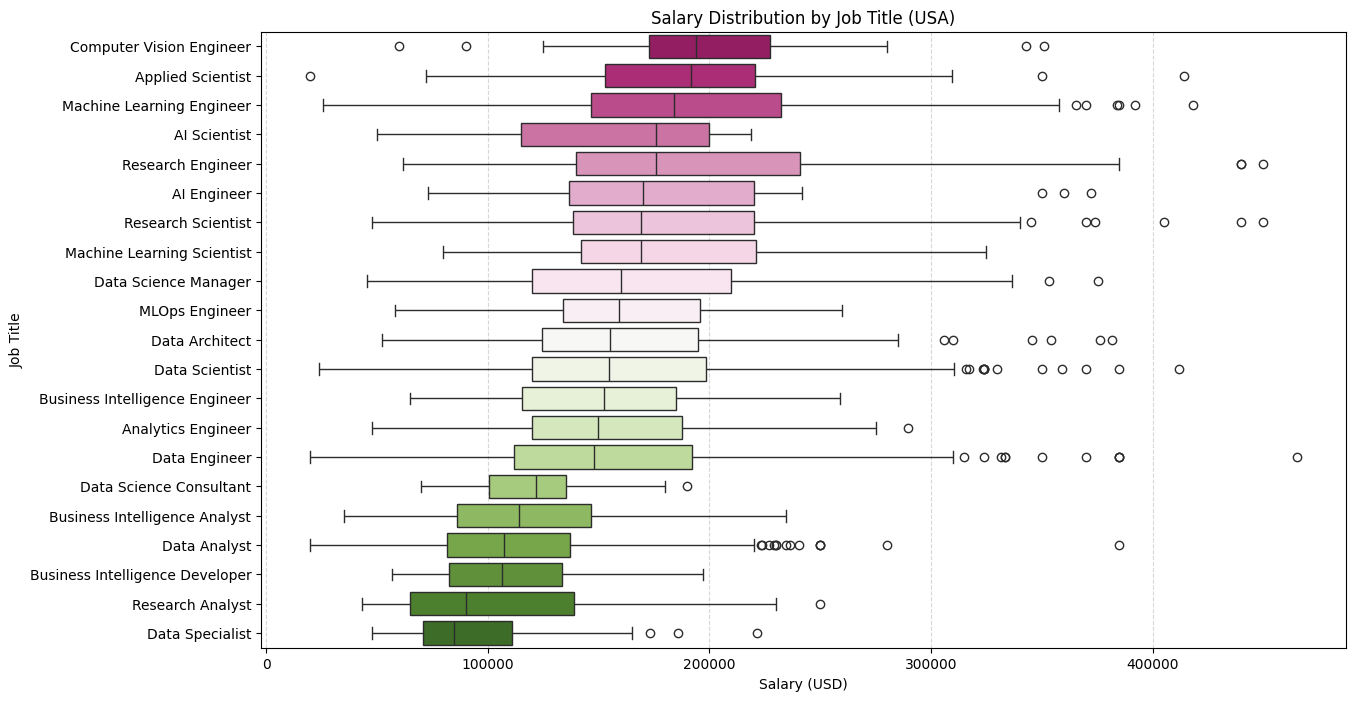

Kruskal-Wallis H-stat: 929.48, P-value: 4.1675e-184
Conclusion: Job title significantly affects salary distribution.


In [325]:
# Sort jobs by median salary to make the plot readable
orden_mediana = df_usa.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_usa, x='salary_in_usd', y='job_title', order=orden_mediana, palette='PiYG')

plt.title('Salary Distribution by Job Title (USA)')
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Statistical Test Kruskal-Wallis
grupos = [df_usa[df_usa['job_title'] == j]['salary_in_usd'] for j in df_usa['job_title'].unique()]
h_stat, p_val = stats.kruskal(*grupos)

print(f"Kruskal-Wallis H-stat: {h_stat:.2f}, P-value: {p_val:.4e}")
if p_val < 0.05:
    print("Conclusion: Job title significantly affects salary distribution.")

In [326]:
print("PROBABILITY RANKING ( USING TE LOGISTIC REGRESSION)")

# We train da model
# max_iter increased for convergence with many features
modelo_log = LogisticRegression(max_iter=3000)
modelo_log.fit(X_encoded, y_binaria)

# Extract Coefficients & Calculate Odds Ratios
# Odds Ratio > 1 means higher probability compared to baseline
tabla_coefs = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': modelo_log.coef_[0]
})
tabla_coefs['Odds_Ratio'] = np.exp(tabla_coefs['Coefficient'])

# Filter and Sort to show Top Jobs
ranking = tabla_coefs[tabla_coefs['Feature'].str.contains('job_title')]
ranking = ranking.sort_values(by='Odds_Ratio', ascending=False).head(15)

print("\n TOP 15 ROLES WITH HIGHEST PROBABILITY OF EARNING > $200K ")
print(ranking[['Feature', 'Odds_Ratio']])

PROBABILITY RANKING ( USING TE LOGISTIC REGRESSION)

 TOP 15 ROLES WITH HIGHEST PROBABILITY OF EARNING > $235K 
                                     Feature  Odds_Ratio
3                job_title_Applied Scientist    2.920064
19               job_title_Research Engineer    2.772759
7         job_title_Computer Vision Engineer    2.492808
16       job_title_Machine Learning Engineer    2.486718
20              job_title_Research Scientist    2.341239
17      job_title_Machine Learning Scientist    1.684407
12            job_title_Data Science Manager    1.311700
13                  job_title_Data Scientist    1.240014
15                  job_title_MLOps Engineer    1.189044
9                   job_title_Data Architect    0.999245
10                   job_title_Data Engineer    0.975838
1                     job_title_AI Scientist    0.816625
6   job_title_Business Intelligence Engineer    0.802800
2               job_title_Analytics Engineer    0.752681
18                job_title_Resea

In [327]:
# Filter USA & Remove Outliers > $600k
df_usa = df[(df['company_location'] == 'United States') & (df['salary_in_usd'] <= 600000)].copy()

# Target Variables
# Binary for Logistic (High Earner > $200k)
umbral_rico = 200000
df_usa['Es_High_Earner'] = (df_usa['salary_in_usd'] > umbral_rico).astype(int)

# Features (One-Hot Encoding)
X_codificado = pd.get_dummies(df_usa[['job_title', 'experience_level']], columns=['job_title'], drop_first=True)
y_binaria = df_usa['Es_High_Earner']
y_continua = df_usa['salary_in_usd']

# Train/Test Split
X_train, X_test, y_bin_train, y_bin_test = train_test_split(X_codificado, y_binaria, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_cont_train, y_cont_test = train_test_split(X_codificado, y_continua, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

--- Model Metrics (Weighted) ---
              precision    recall  f1-score   support

           0       0.94      0.51      0.66       787
           1       0.32      0.88      0.47       212

    accuracy                           0.59       999
   macro avg       0.63      0.69      0.57       999
weighted avg       0.81      0.59      0.62       999


--- Top 5 Factors for reaching > Threshold ---
                                Feature  Odds_Ratio
3           job_title_Applied Scientist    3.382080
19          job_title_Research Engineer    3.218052
20         job_title_Research Scientist    2.985891
7    job_title_Computer Vision Engineer    2.849225
16  job_title_Machine Learning Engineer    2.656550


/tmp/ipython-input-2101035011.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2101035011.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


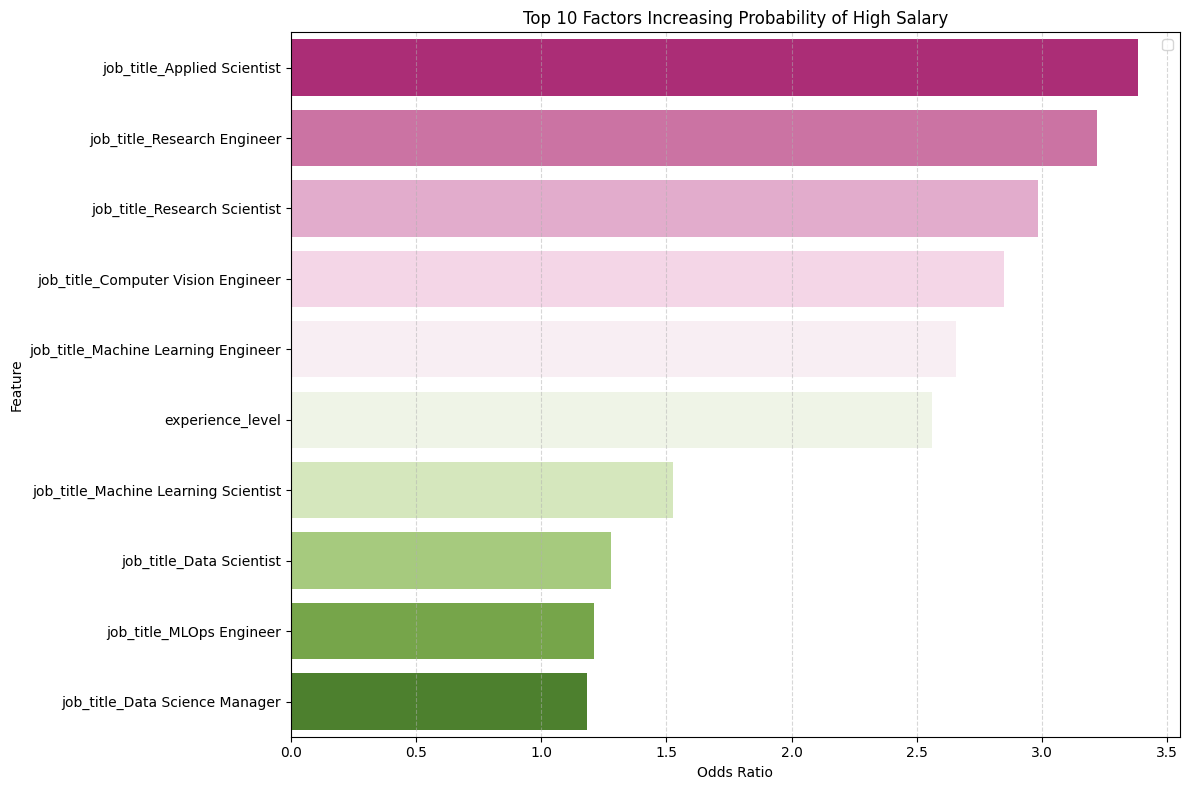

In [328]:
print("LOGISTIC REGRESSION")

# Train Model
modelo_log_bal = LogisticRegression(max_iter=3000, class_weight='balanced')
modelo_log_bal.fit(X_train, y_bin_train)

# Predictions
y_pred_bal = modelo_log_bal.predict(X_test)

# Metrics
print("\n--- Model Metrics (Weighted) ---")
print(classification_report(y_bin_test, y_pred_bal))

# Calculation of Odds Ratios
coeficientes = pd.DataFrame({
    'Feature': X_train.columns,
    'Odds_Ratio': np.exp(modelo_log_bal.coef_[0])
})

# Top 10 factors for visualization
top_factores = coeficientes.sort_values(by='Odds_Ratio', ascending=False).head(10)

print("\n--- Top 5 Factors for reaching > Threshold ---")
print(top_factores.head(5))

# Visualization
plt.figure(figsize=(12, 8))

sns.barplot(
    data=top_factores,
    x='Odds_Ratio',
    y='Feature',
    palette='PiYG'
)

plt.title('Top 10 Factors Increasing Probability of High Salary')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Decision Tree

Tree Metrics Resut
R2 Score (Explanatory Power): 0.1990
MAE (Average Error): $43,583.76


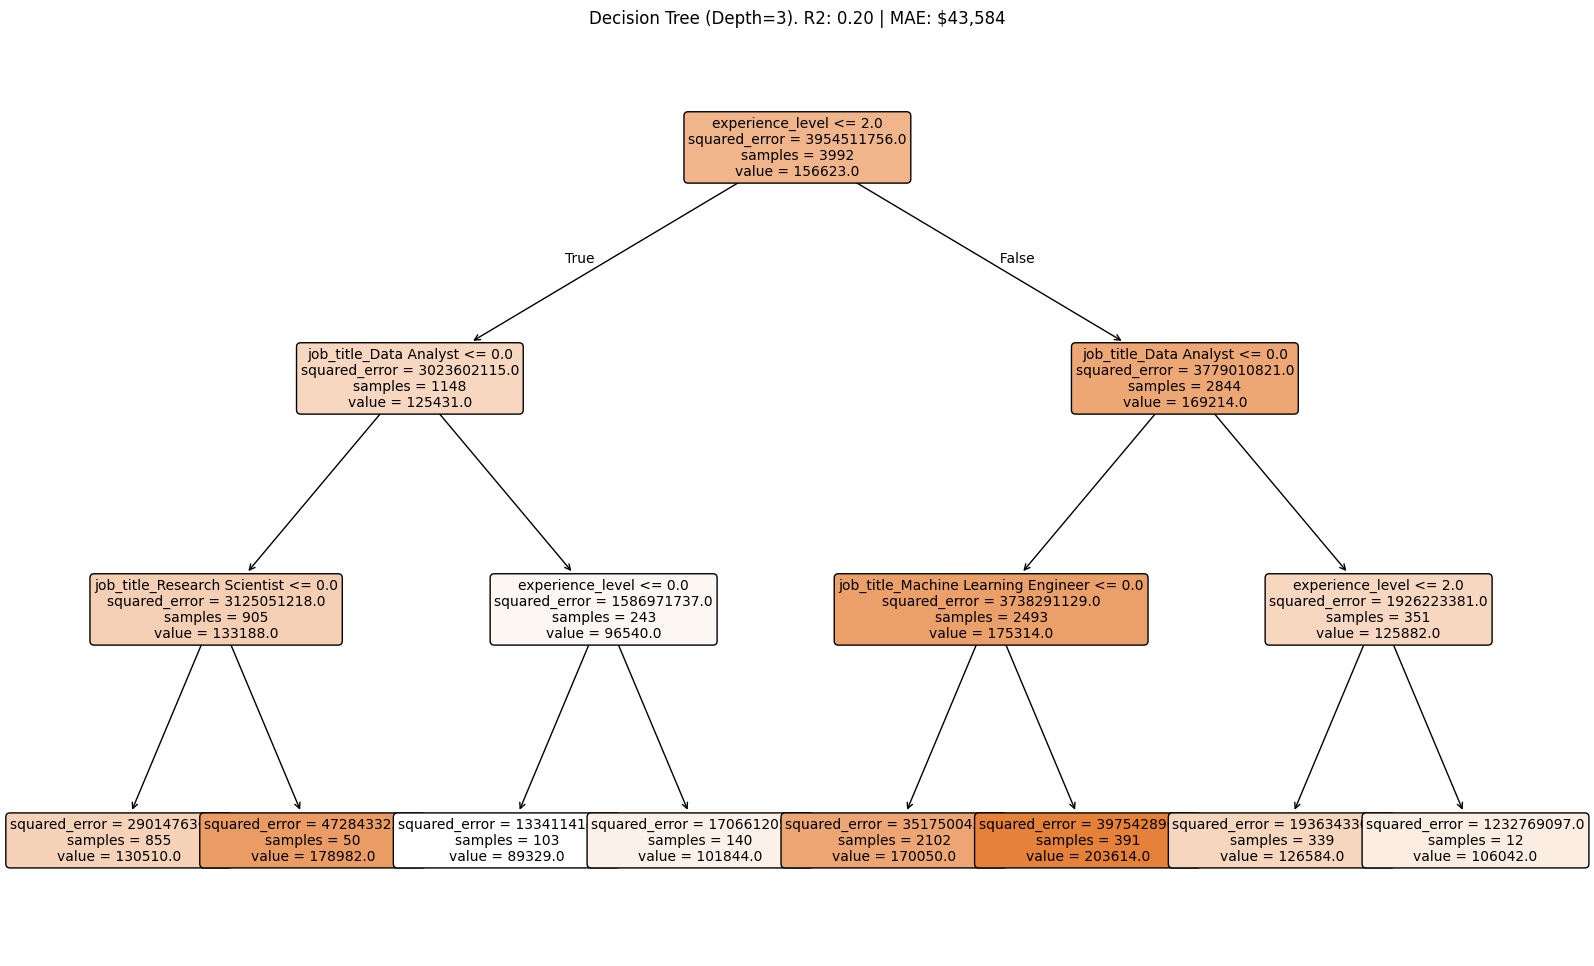

In [329]:
# Our last tool

print("Decision Tree")

# Train Optimized Tree
arbol = DecisionTreeRegressor(max_depth=3, random_state=42)
arbol.fit(X_train_reg, y_cont_train)

# Metrics Calculation
y_pred_tree = arbol.predict(X_test_reg)
r2 = r2_score(y_cont_test, y_pred_tree)
mae = mean_absolute_error(y_cont_test, y_pred_tree)

print("\nTree Metrics Resut")
print(f"R2 Score (Explanatory Power): {r2:.4f}")
print(f"MAE (Average Error): ${mae:,.2f}")

# Plotting
plt.figure(figsize=(20, 12))
plot_tree(arbol, feature_names=X_train_reg.columns, filled=True, rounded=True, fontsize=10, precision=0)
plt.title(f'Decision Tree (Depth=3). R2: {r2:.2f} | MAE: ${mae:,.0f}')
plt.show()